In [1]:
import os

# Set current working directory to "INDE-597-Group-A" (the outermost folder in the repository) for proper package imports
os.chdir("C:/Users/georg/OneDrive/Documents/Rice University/Current Coursework/Inde597 Deep and Reinforcement Learning/Code/INDE-597-Group-A")

import numpy as np
import matplotlib.pyplot as plt

from Ch6.temporal_difference import *
from environments.training import EnvironmentSolitaire

In [2]:
class WindyGridworld(EnvironmentSolitaire):
    '''
    This environment implements the windy gridworld
    '''
    
    # Shape of board
    board_shape = (10, 7)
    
    # The updraft at each column
    updraft = (0, 0, 0, 1, 1, 1, 2, 2, 1, 0)
    
    # Start and end locations
    start = (0, 3)
    goal = (7, 3)
    
    def get_actions(self):
        '''
        RETURNS set of up down left right movements
        '''
        return ("U", "D", "L", "R")
    
    def step(self, action):
        '''
        Steps in the current game
        Mutates self.current_state to be the next state
        INPUT
            action; action taken at this step
        RETURNS 3 arguments
            0: next state after the step
            1: reward for the action
            2: boolean flag whether the environment has terminated
        '''
        # Move the player
        new_state = list(self.current_state)
        match action:
            case "U":
                new_state[1] += 1
            case "D":
                new_state[1] += -1
            case "L":
                new_state[0] += -1
            case "R":
                new_state[0] += 1
        new_state[1] += self.updraft[self.current_state[0]]
        
        # Set player within bounds, if they exceeded the bounds
        new_state[0] = max(new_state[0], 0)
        new_state[0] = min(new_state[0], self.board_shape[0] - 1)
        new_state[1] = max(new_state[1], 0)
        new_state[1] = min(new_state[1], self.board_shape[1] - 1)
        
        # Return
        new_state = tuple(new_state)
        reward = -1
        done = (new_state == self.goal)
        self.current_state = new_state
        return self.current_state, reward, done
    
    def reset(self):
        # Resets to start
        self.current_state = self.start
        return self.start        

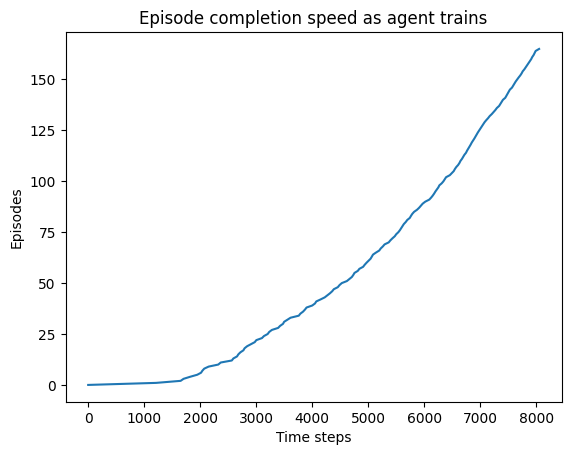

In [3]:
agent = Sarsa(eps=0.1, alpha=0.5, gamma=1)
game = WindyGridworld(agent)

steps = [0]
while steps[-1] < 8000:
    history, reward = game.play_game()
    steps.append(steps[-1] + len(history))
    
plt.plot(steps, range(len(steps)))
plt.xlabel("Time steps")
plt.ylabel("Episodes")
plt.title("Episode completion speed as agent trains")
plt.show()

In [5]:
print(f"Avg traversal: {abs(np.mean([agent.Q[(game.start, act)] for act in game.get_actions()]))}")

Avg traversal: 16.68825915595712
